# Ownerships in Bogota, Colombia

The main goal of this inmersion is to generate a model which predicts the cost of an ownership in the different neighborhoods in Bogota, using the dataset called "inmuebles_bogota.csv"

## Importing and describing our data

### Importing libraries that will be used

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\inmuebles_bogota.csv")
data.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


## We will try to answere the next questions:

Q1.- Is there any outlayer in the columns "Rooms", "Bathrooms", "Area"?

Q2.- Are all ownerships at sale?

Q3.- How many categories are in the "Type" column and how many ownerships are in each one?

Q4.- How many ownerships are by neighborhood?

Q5.- What is the mean cost/m2 for each neighborhood? 

Q6.- Which are the top 10 neighborhoods with the highest variation in cost?

Q7.- Which are the top 10 neighborhoods with the highest mean cost?

Q8.- Which are the top 10 neighborhoods with the cheapest mean cost?

### 1.- Knowing and cleaning data

In this section I will remove any possible errors I might get because of 

- strange characters

- wrong type values

- Values that does not make sense

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


- It is clear that the characters "ñ" and "Á" might be problematique, so I will take them off.

In [241]:
data=data.rename(columns={"Área":"Area",
                          "Baños":"Bathrooms",
                          "Descripcion":"Description",
                          "Habitaciones":"Rooms",
                          "Barrio":"Neighborhood",
                          "Valor":"Cost",
                          "Tipo":"Type"})
data.Type=data.Type.str.replace("Casa", "House")
data.Type=data.Type.str.replace("Apartamento", "Department")
data.Type=data.Type.str.replace("Lote", "Lot")
data.Type=data.Type.str.replace("Finca", "Land property")
data.Type=data.Type.str.replace("Oficina/Consultorio", "Office")
data.Type=data.Type.str.replace("Bodega", "Cellar")
data.Type=data.Type.str.replace("Edificio", "Building")


- I will change the data type of "Cost" column, from object (string) to float and I will change the unit to millions

In [242]:
data["cost_millions"] = data.Cost.str.split(regex=True, expand = True )[1] # regex = read regular expresions and expand returns a Series
data.cost_millions = data.cost_millions.str.replace(".","")
data.cost_millions = data.cost_millions.astype("int64")/1e6

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_23096\1093578096.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.cost_millions = data.cost_millions.str.replace(".","")


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           9520 non-null   object 
 1   Description    9520 non-null   object 
 2   Rooms          9520 non-null   int64  
 3   Bathrooms      9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Neighborhood   9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Cost           9520 non-null   object 
 8   cost_millions  9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


Now data types are right, I will check for unusual values depending of the columns

In [244]:
data.describe()

,Rooms,Bathrooms,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


I just need two decimals, so I will change the display of the numbers

In [245]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format",lambda x: "%.2f" %x)
data.describe()

,Rooms,Bathrooms,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


For example, I can see the max rooms number and check for the info, just in case it might be a data that do not correspond with the Area value

In [246]:
data[data.Rooms == data.Rooms.max()]

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions
897,House,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,480.00


Also we can looking for the colums with the min area

In [247]:
data.query("Area == @data.Area.min()")

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions
8401,Department,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,180.00


As we can see, the number of rooms might be wrong because it has the same value as Area, and is a home, so it is impossible to have 110 rooms in a house with 110 m2 area, also, there's no reason to have 3 rooms in an 2 m2 area.
To see clearly all the outlayers I will create a boxplot of both parameters.

## Boxplot: Rooms by type of onwership

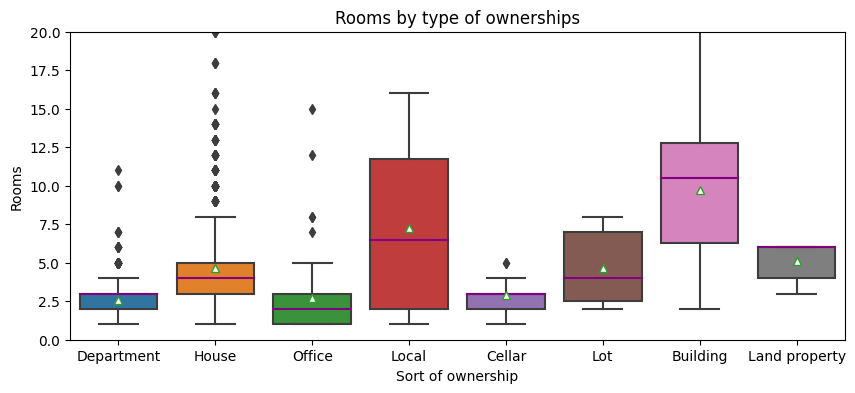

In [248]:
plt.figure(figsize=(10,4))
gp=sns.boxplot(
                data=data,
                x="Type",
                y="Rooms",
                showmeans=True,
                medianprops={
                    "color" : "purple",
                },
                meanprops={
                    "markerfacecolor" : "white",
                }
               
               ) #create a boxplot of rooms divided by sort of ownership 
gp.set_title("Rooms by type of ownerships")
gp.set_xlabel("Sort of ownership")
gp.set_ylim(0,20)
gp.set_ylabel("Rooms")
plt.show()

## Boxplot: Areas by type of onwership

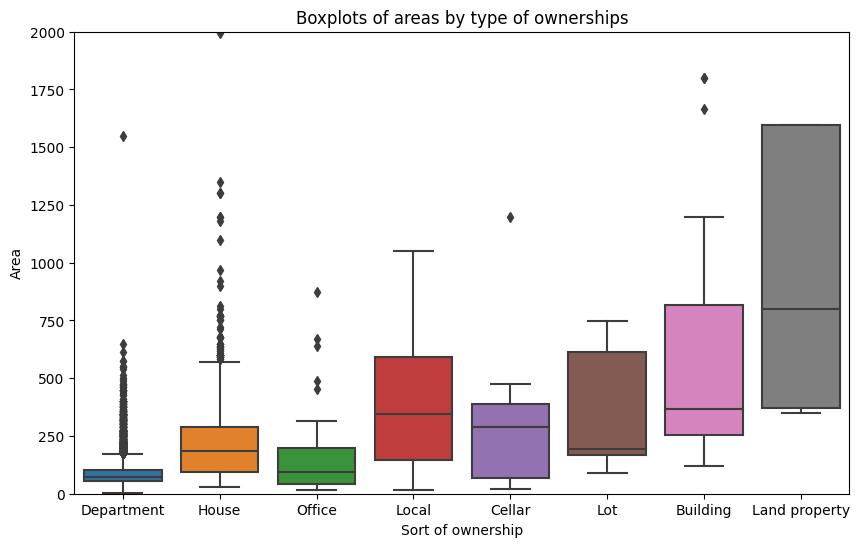

In [249]:
plt.figure(figsize=(10,6))
gp=sns.boxplot(data=data, x="Type",y="Area") #create a boxplot of rooms divided by sort of ownership 
gp.set_title("Boxplots of areas by type of ownerships")
gp.set_xlabel("Sort of ownership")
gp.set_ylabel("Area")
gp.set_ylim(0,2000)
plt.show()

## Boxplot: Cost of the top 3 neighborhoods with most onwerships at sale

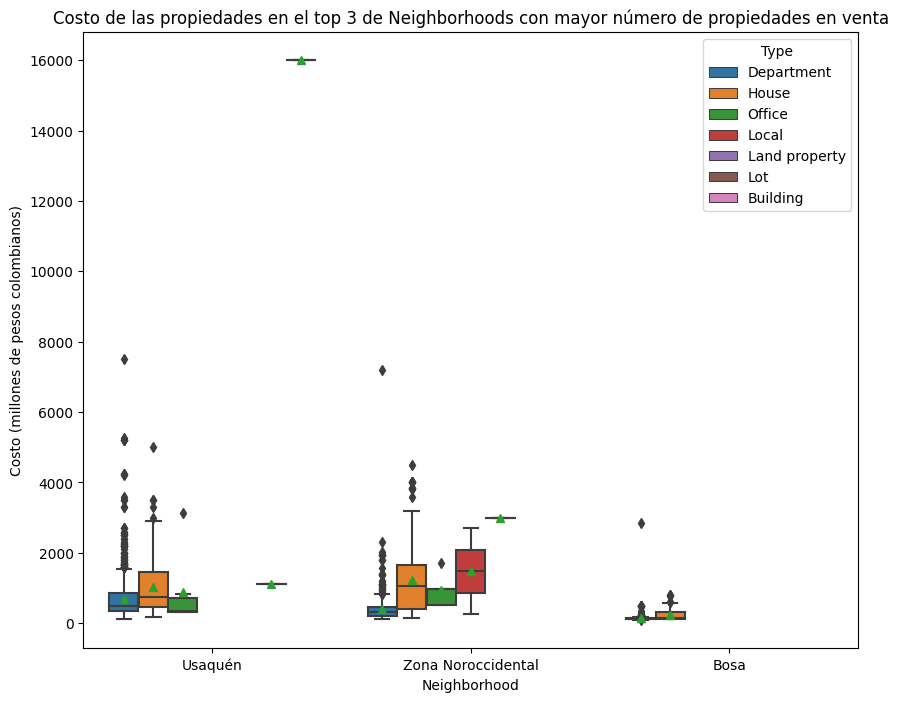

In [250]:
top_Neighborhoods=data.Neighborhood.value_counts()[:3].index.tolist() #list of top 10 neighborhoods with most ownerships at sale
df_top_Neighborhoods=data.query("Neighborhood in @top_Neighborhoods")# get a df with all data of the top Neighborhoods
plt.figure(figsize=((10,8)))
gp=sns.boxplot(data=df_top_Neighborhoods, x="Neighborhood", y="cost_millions",order=top_Neighborhoods, hue="Type", showmeans=True) 
#sort by top Neighborhoods and sort of property
#plt.xticks(rotation=45)
gp.set_xlabel("Neighborhood")
gp.set_ylabel("Costo (millones de pesos colombianos)")
gp.set_title("Costo de las propiedades en el top 3 de Neighborhoods con mayor número de propiedades en venta")
plt.show()

The lines represents my boxplot, it is because cuartile 1 and 3, or percentil 25 and 75 has the same number, so the box became a line, it's hard to have many ownerships with the same cost, so it might be just one data in each type where I got a line. I will remove those types of ownership

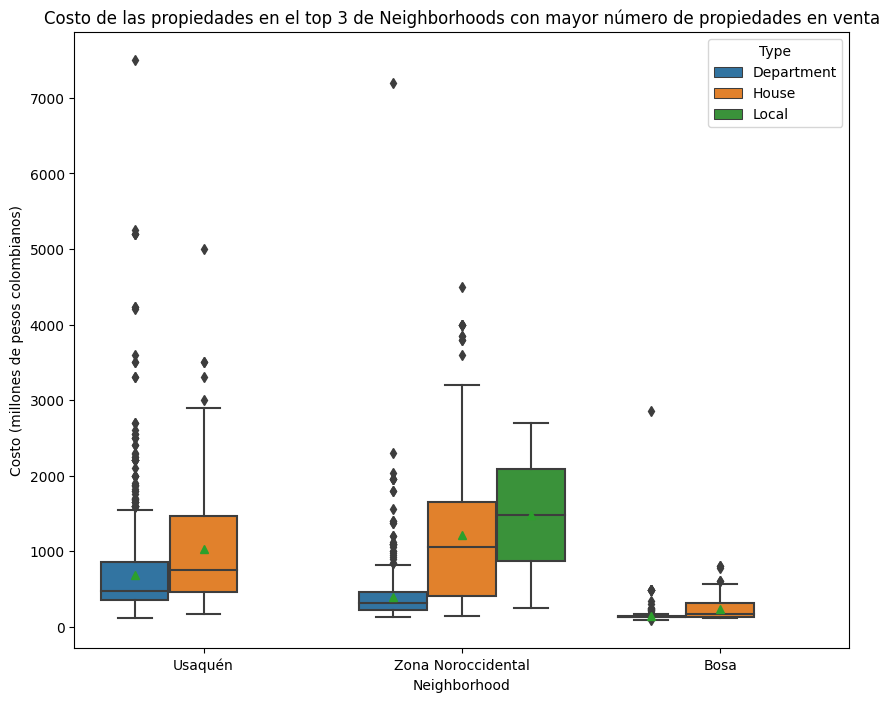

In [253]:
top_Neighborhoods=data.Neighborhood.value_counts()[:3].index.tolist() #list of top 3 neighborhoods with most ownerships at sale
ownshp_types=["Department","House","Local"]
df_top_Neighborhoods=data.query("(Neighborhood in @top_Neighborhoods) & (Type in @ownshp_types)")# get a df with all data of the top Neighborhoods
plt.figure(figsize=((10,8)))
gp=sns.boxplot(data=df_top_Neighborhoods, x="Neighborhood", y="cost_millions",order=top_Neighborhoods, hue="Type", showmeans=True) 
#sort by top Neighborhoods and sort of property
gp.set_xlabel("Neighborhood")
gp.set_ylabel("Costo (millones de pesos colombianos)")
gp.set_title("Costo de las propiedades en el top 3 de Neighborhoods con mayor número de propiedades en venta")
plt.show()


## Top 10 average cost/area by neighborhood 

In [278]:
df_nbhds=data.groupby("Neighborhood").sum(numeric_only=True) #numeric_only will 
# need to be changed to True in future versions
df_nbhds["c_a_m"]=df_nbhds.cost_millions/df_nbhds.Area #c_a_m=cost_area_millions
df_nbhds.reset_index(drop=False,inplace=True)
df_nbhds.sort_values("c_a_m",ascending=False,inplace=True)
df_nbhds

,Neighborhood,Rooms,Bathrooms,Area,cost_millions,c_a_m
124,Santa Ana,29,35,2475,25380.00,10.25
49,El Virrey,12,16,563,5590.00,9.93
65,La Candelaria,95,83,5559,49415.30,8.89
70,La Merced,2,3,82,719.00,8.77
40,El Castillo,12,14,537,4550.00,8.47
...,...,...,...,...,...,...
80,Las Ferias,22,12,640,1100.00,1.72
83,Libertador,18,16,2568,4080.00,1.59
116,Roma,8,3,260,350.00,1.35
11,Bosa Piamonte,12,8,800,940.00,1.18


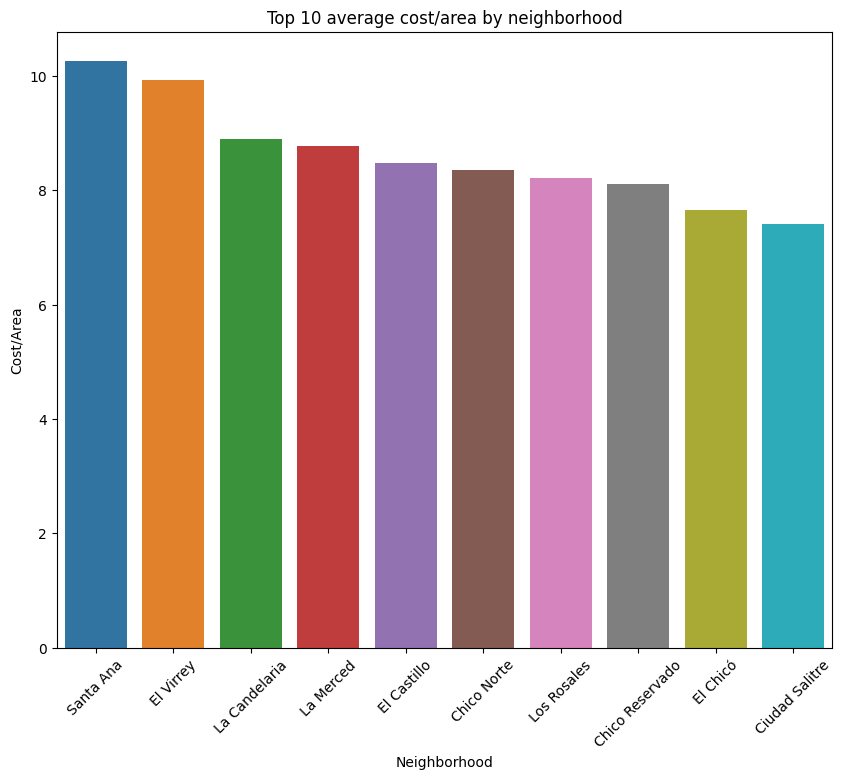

In [280]:
plt.figure(figsize=((10,8)))
gp=sns.barplot(data=df_nbhds, x=df_nbhds.Neighborhood.head(10), y="c_a_m")
plt.xticks(rotation=45)
gp.set_title("Top 10 average cost/area by neighborhood")
gp.set_ylabel("Cost/Area")
plt.show()